# K-means only clustering

In this notebook, I'll be running K-means clustering on the feature engineered data from namesake notebook and seeing what results we get.

## Imports and Data Checking

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Setting for full table display
pd.set_option('display.max_columns', None)

In [3]:
# Import data
df = pd.read_csv('data/feature_engineered_data.csv')

# print the first few rows to confirm the data has been loaded correctly
df.head()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,EducationOrdinalEncoded,Relationship_InRelationship,Relationship_NotInRelationship,Relationship_Undefined,ChildrenHome,RegencyInMonths,TotalSpent,DealSeeker,BuyerType_CatalogueBuyer,BuyerType_MixedBuyer,BuyerType_StoreBuyer,BuyerType_WebBuyer,VisitedWebsiteRecently,AcceptedOffer
0,58138,58,635,88,546,172,88,88,3,8,10,4,7,57,2,0,1,0,0,32,1617,1,1,0,0,0,1,1
1,46344,38,11,1,6,2,1,6,2,1,1,2,5,60,2,0,1,0,1,5,27,0,0,0,1,0,1,0
2,71613,26,426,49,127,111,21,42,1,8,2,10,4,49,2,1,0,0,0,16,776,0,0,0,1,0,1,0
3,26646,26,11,4,20,10,3,5,2,2,0,4,6,30,2,1,0,0,1,3,53,0,0,0,1,0,1,0
4,58293,94,173,43,118,46,27,15,5,5,3,6,5,33,5,1,0,0,1,11,422,1,0,0,1,0,1,0


In [4]:
# Check the general information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2236 entries, 0 to 2235
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Income                          2236 non-null   int64
 1   Recency                         2236 non-null   int64
 2   MntWines                        2236 non-null   int64
 3   MntFruits                       2236 non-null   int64
 4   MntMeatProducts                 2236 non-null   int64
 5   MntFishProducts                 2236 non-null   int64
 6   MntSweetProducts                2236 non-null   int64
 7   MntGoldProds                    2236 non-null   int64
 8   NumDealsPurchases               2236 non-null   int64
 9   NumWebPurchases                 2236 non-null   int64
 10  NumCatalogPurchases             2236 non-null   int64
 11  NumStorePurchases               2236 non-null   int64
 12  NumWebVisitsMonth               2236 non-null   int64
 13  Age

In [5]:
# Check the number of null values in each column
df.isnull().sum()

Income                            0
Recency                           0
MntWines                          0
MntFruits                         0
MntMeatProducts                   0
MntFishProducts                   0
MntSweetProducts                  0
MntGoldProds                      0
NumDealsPurchases                 0
NumWebPurchases                   0
NumCatalogPurchases               0
NumStorePurchases                 0
NumWebVisitsMonth                 0
Age                               0
EducationOrdinalEncoded           0
Relationship_InRelationship       0
Relationship_NotInRelationship    0
Relationship_Undefined            0
ChildrenHome                      0
RegencyInMonths                   0
TotalSpent                        0
DealSeeker                        0
BuyerType_CatalogueBuyer          0
BuyerType_MixedBuyer              0
BuyerType_StoreBuyer              0
BuyerType_WebBuyer                0
VisitedWebsiteRecently            0
AcceptedOffer               

Import is all good. Lets get to basic clustering!

## All the features

Firstly, lets go for the most ham-fisted way of clustering and use all the features in the dataset. We'll have a look at both the elbow and the silhouette methods to evaluate our results.

In [6]:
# Imports
from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

In [7]:
df_all = df.copy()

In [8]:
df_all.columns.tolist()

['Income',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'Age',
 'EducationOrdinalEncoded',
 'Relationship_InRelationship',
 'Relationship_NotInRelationship',
 'Relationship_Undefined',
 'ChildrenHome',
 'RegencyInMonths',
 'TotalSpent',
 'DealSeeker',
 'BuyerType_CatalogueBuyer',
 'BuyerType_MixedBuyer',
 'BuyerType_StoreBuyer',
 'BuyerType_WebBuyer',
 'VisitedWebsiteRecently',
 'AcceptedOffer']

In [9]:
# Scaling of continuous features
continuous_features = ['Income',
                       'Recency',
                       'MntWines',
                       'MntFruits',
                       'MntMeatProducts',
                       'MntFishProducts',
                       'MntSweetProducts',
                       'MntGoldProds',
                       'NumDealsPurchases',
                       'NumWebPurchases',
                       'NumCatalogPurchases',
                       'NumStorePurchases',
                       'NumWebVisitsMonth',
                       'Age',
                       'RegencyInMonths',
                       'TotalSpent']

# Standardize continuous features using RobustScaler
scaler_continuous = RobustScaler()
df_all[continuous_features] = scaler_continuous.fit_transform(df_all[continuous_features])

In [10]:
# Extract all columns as features
data = df_all.values

### Elbow Method

In [11]:
# Instantiate the KMeans model
elb_kmeans = KMeans(random_state=13)

In [12]:
# Use the KElbowVisualizer for the elbow method
elbow_visualizer = KElbowVisualizer(elb_kmeans, k=(1, 10))

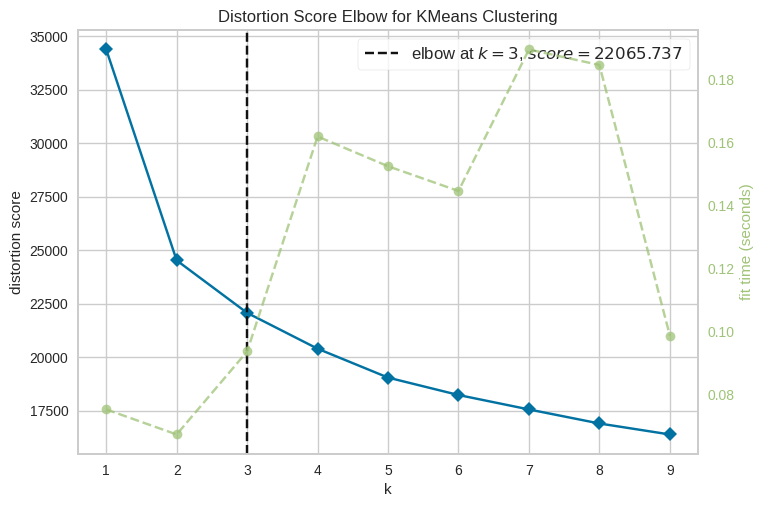

In [13]:
# Fit the visualizer to the data
elbow_visualizer.fit(data)

# Visualize the elbow method result
elbow_visualizer.show()
plt.show()

### Silhouette Method

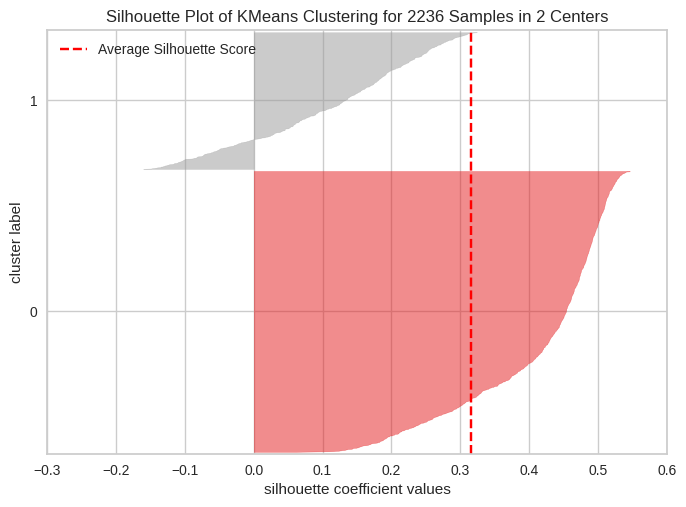

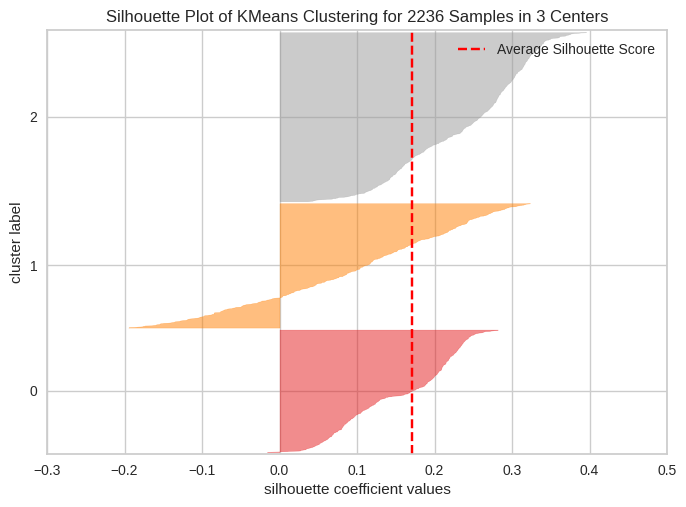

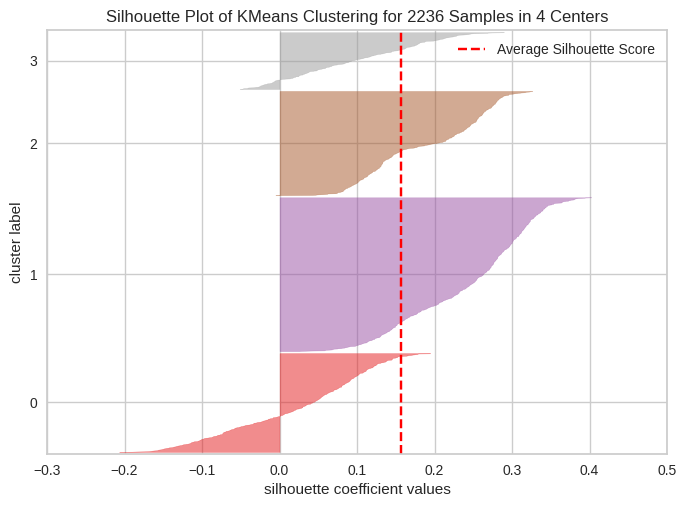

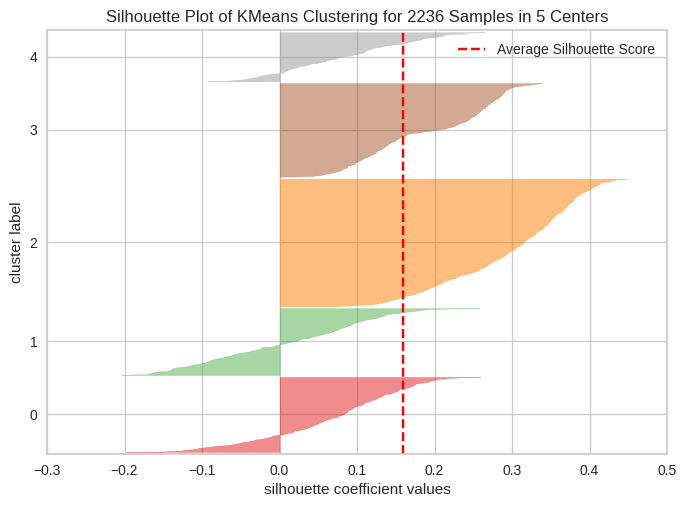

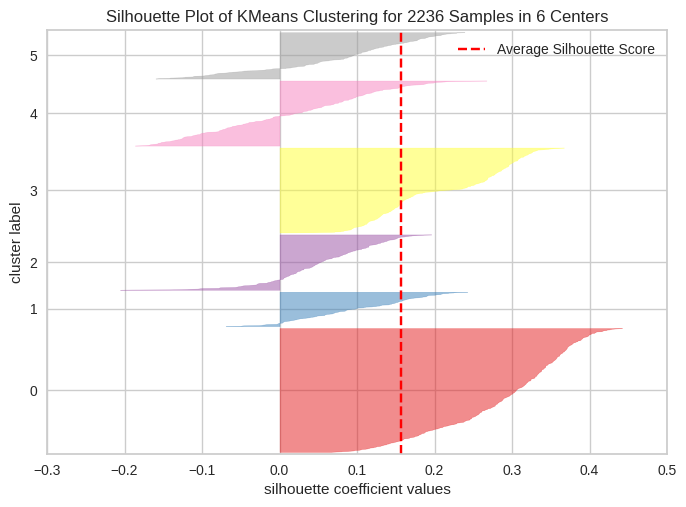

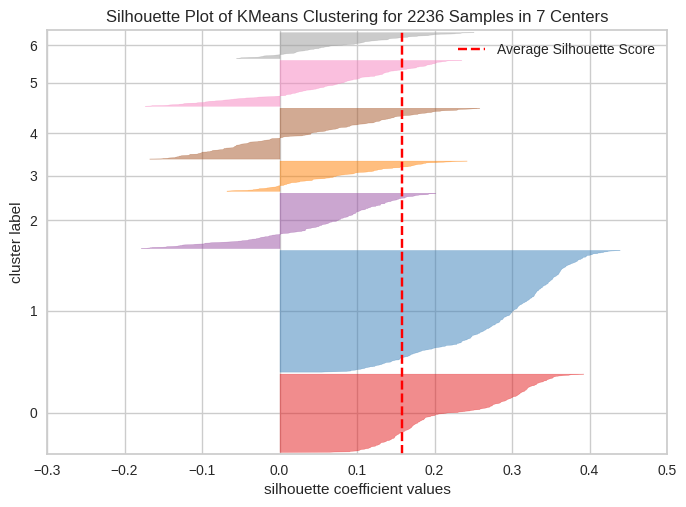

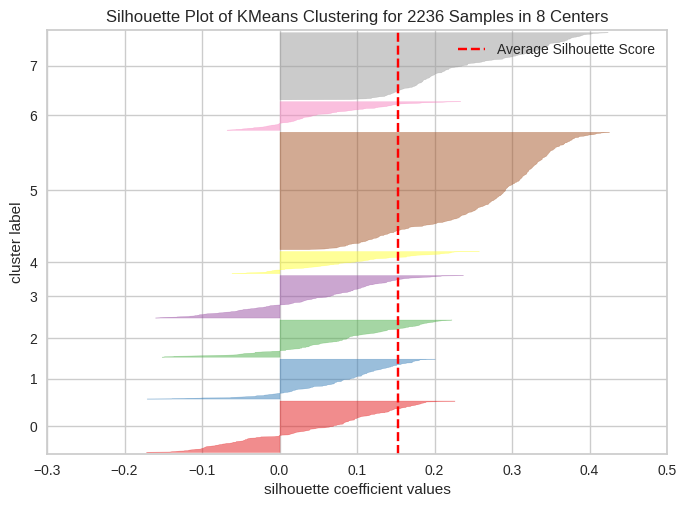

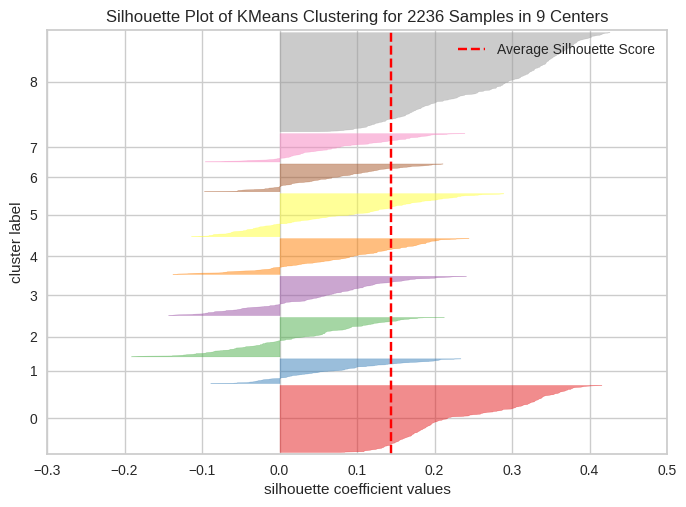

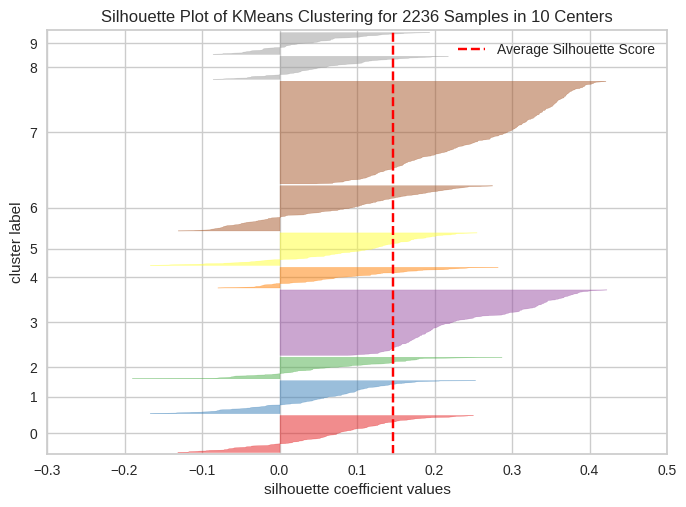

In [14]:
def plot_silhouette(data, k_range=(2, 10)):
    """
    Plot Silhouette scores for different values of k.

    Parameters:
    - data: numpy array or pandas DataFrame, input data for clustering
    - k_range: tuple, range of k values to consider (default is 2 to 10)

    Returns:
    - best_k: int, the optimal number of clusters
    """
    best_score = -1  # Initialize with a value lower than any possible silhouette score
    best_k = None
    best_visualizer = None

    for k in range(k_range[0], k_range[1] + 1):
        # Instantiate the KMeans model
        silo_kmeans = KMeans(n_clusters=k)

        # Use the SilhouetteVisualizer for the Silhouette method
        visualizer = SilhouetteVisualizer(silo_kmeans)

        # Fit the visualizer to the data
        visualizer.fit(data)

        # Get the average silhouette score
        avg_score = visualizer.silhouette_score_

        # Visualize the Silhouette method result
        visualizer.show()

        # Check if this iteration has a higher silhouette score
        if avg_score > best_score:
            best_score = avg_score
            best_k = k
            best_visualizer = visualizer

    # Return the optimal number of clusters
    return best_k

# Use the function to plot silhouette scores and get the best visualizer
optimal_k = plot_silhouette(data, k_range=(2, 10))

In [15]:
print(optimal_k)

2


The silhouette is very inconclusive, elbow method shows 3 as the best groping see we'll go with that.

## Visualise outcome

In [16]:
# Instantiate the KMeans model with the optimal number of clusters
kmeans = KMeans(n_clusters=3)
# Fit the model to the data
kmeans.fit(data)
# Get cluster assignments for each data point
labels = kmeans.labels_
# Add the cluster labels to your DataFrame
df['cluster'] = labels

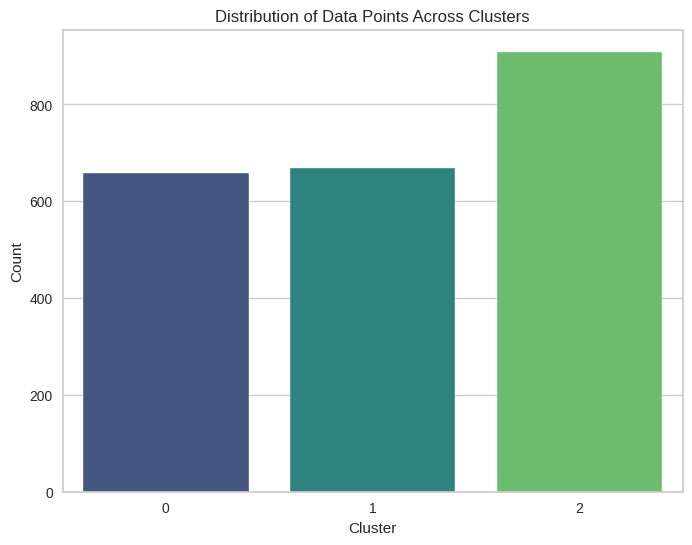

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(x='cluster', data=df, palette='viridis')
plt.title('Distribution of Data Points Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

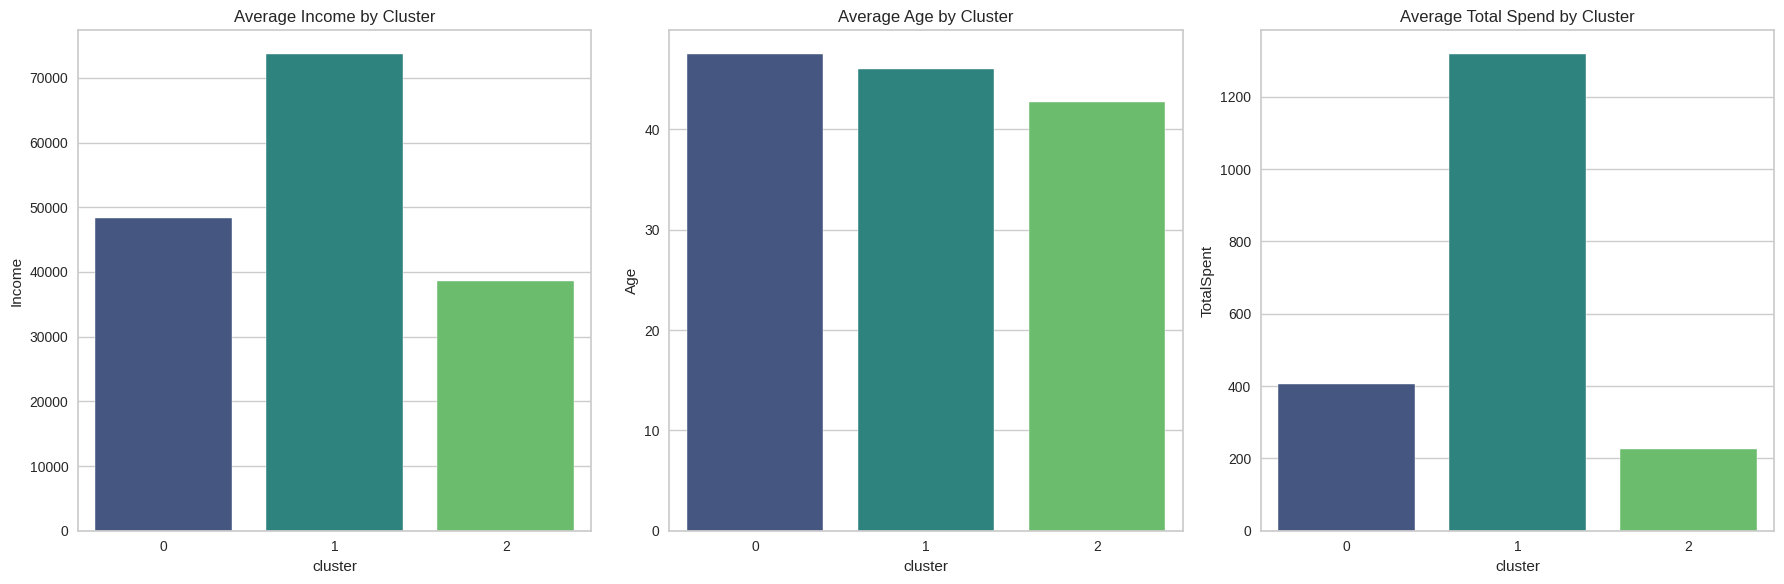

In [18]:
# Calculate average income, average age, and average total spend for each cluster
cluster_summary = df.groupby('cluster').agg({
    'Income': 'mean',
    'Age': 'mean',
    'TotalSpent': 'mean'
}).reset_index()

# Set up the subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot average income
sns.barplot(x='cluster', y='Income', data=cluster_summary, ax=axes[0], palette='viridis')
axes[0].set_title('Average Income by Cluster')

# Plot average age
sns.barplot(x='cluster', y='Age', data=cluster_summary, ax=axes[1], palette='viridis')
axes[1].set_title('Average Age by Cluster')

# Plot average total spend
sns.barplot(x='cluster', y='TotalSpent', data=cluster_summary, ax=axes[2], palette='viridis')
axes[2].set_title('Average Total Spend by Cluster')

# Adjust layout
plt.tight_layout()
plt.show()


In [19]:
df['cluster'].value_counts()

2    909
1    669
0    658
Name: cluster, dtype: int64